# Decision Tree

A decision tree is a flowchart-like tree structure where an **internal node** represents *feature(or attribute)*, the **branch** represents a *decision rule*, and each **leaf node** represents the *outcome*.

### How does the Decision Tree algorithm work?
The basic idea behind any decision tree algorithm is as follows:

1. Select the best attribute using Attribute Selection Measures(ASM) to split the records.
2. Make that attribute a decision node and breaks the dataset into smaller subsets.
3. Starts tree building by repeating this process recursively for each child until 
one of the condition will match:

    . All the tuples belong to the same attribute value.
    
    . There are no more remaining attributes.
    
    . There are no more instances.

### Loading Data
Let's first load the required Pima Indian Diabetes dataset using pandas' read CSV function. You can download the data from https://www.kaggle.com/uciml/pima-indians-diabetes-database.

In [3]:
import pandas as pd

#pima = pd.read_csv("D:/Data/diabetes.csv")

In [ ]:
pima

In [4]:
# define the column_name
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("D:/Data/diabetes.csv", header=None, names=col_names,skiprows=1)

In [12]:
#
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [5]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

### Splitting Data
To understand model performance, dividing the dataset into a **training set** and a **test set** is a good strategy.

Let's split the dataset by using function *train_test_split()*. You need to pass 3 parameters features, target, and test_set size.

In [6]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split # Import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [7]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [8]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6623376623376623


In [70]:
#print("F1 Score:",metrics.f1_score(y_test, y_pred))

In [71]:
#print("Precision:",metrics.precision_score(y_test, y_pred))

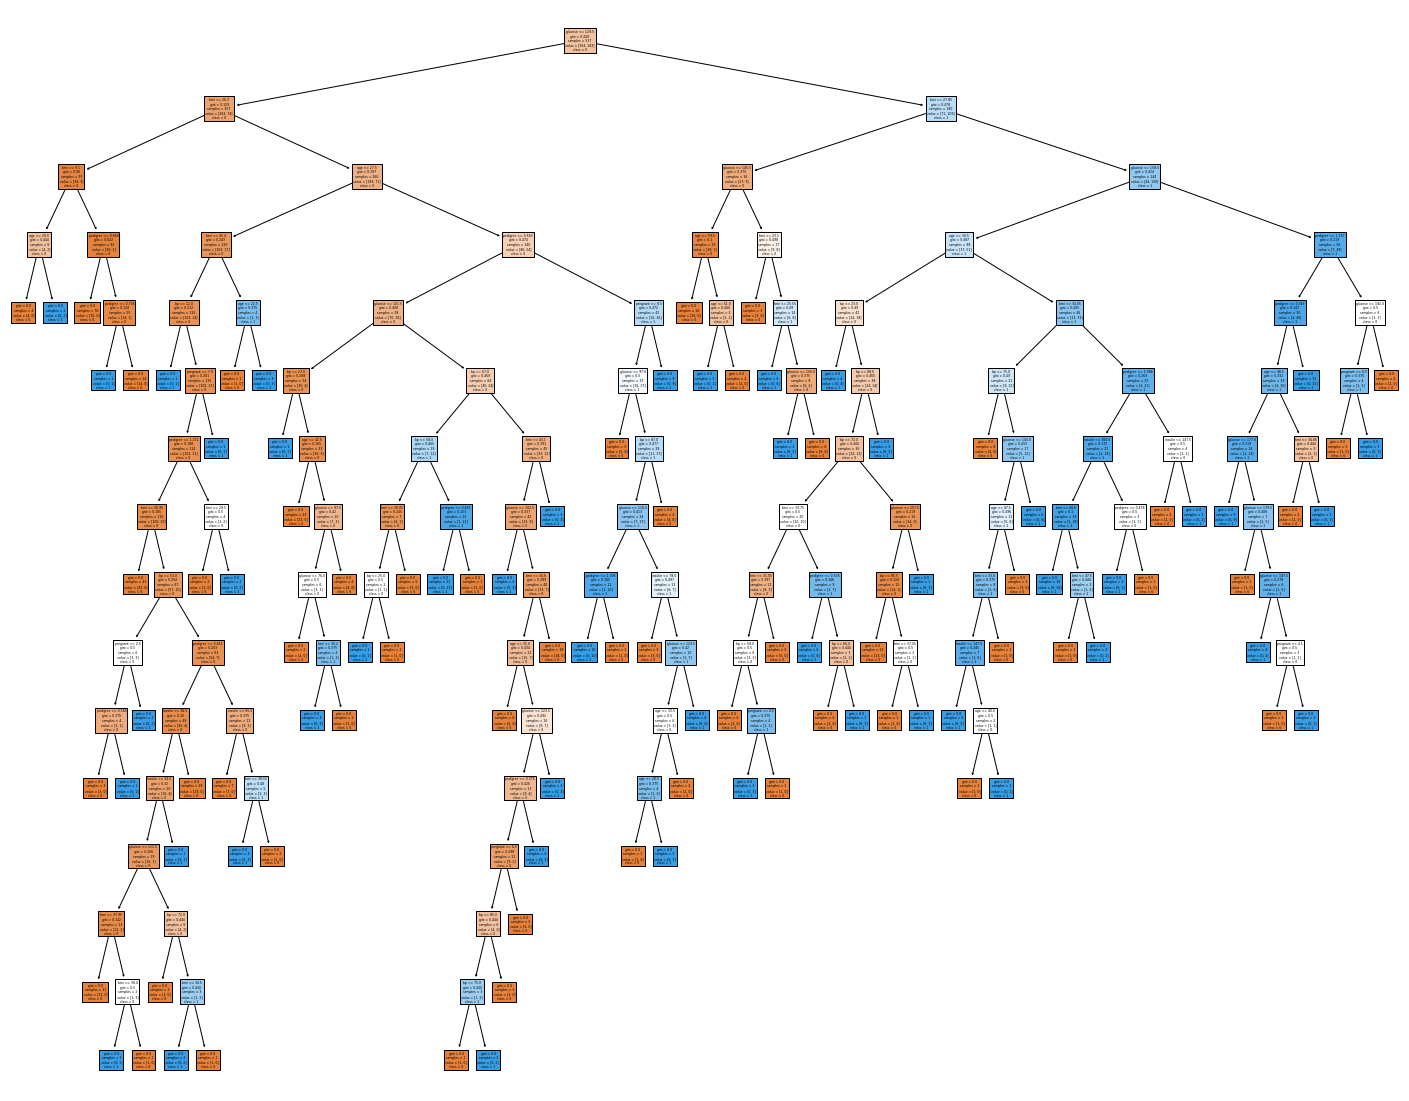

In [9]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
plt_tree = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)

## Optimizing Decision Tree Performance

#### criterion : optional (default=”gini”) or Choose attribute selection measure: 
This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

#### splitter : string, optional (default=”best”) or Split Strategy: 
This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

#### max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: 
The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. 
*The higher value of maximum depth* causes **overfitting**, and a *lower value* causes **underfitting**

In Scikit-learn, optimization of decision tree classifier performed by only **pre-pruning**.

 *Maximum depth* of the tree can be used as a control variable for pre-pruning. 

In the following the example, you can plot a decision tree on the same data with max_depth=3. 

Other than pre-pruning parameters, You can also try other attribute selection measure such as **entropy**.

In [13]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


### Visualizing Decision Trees

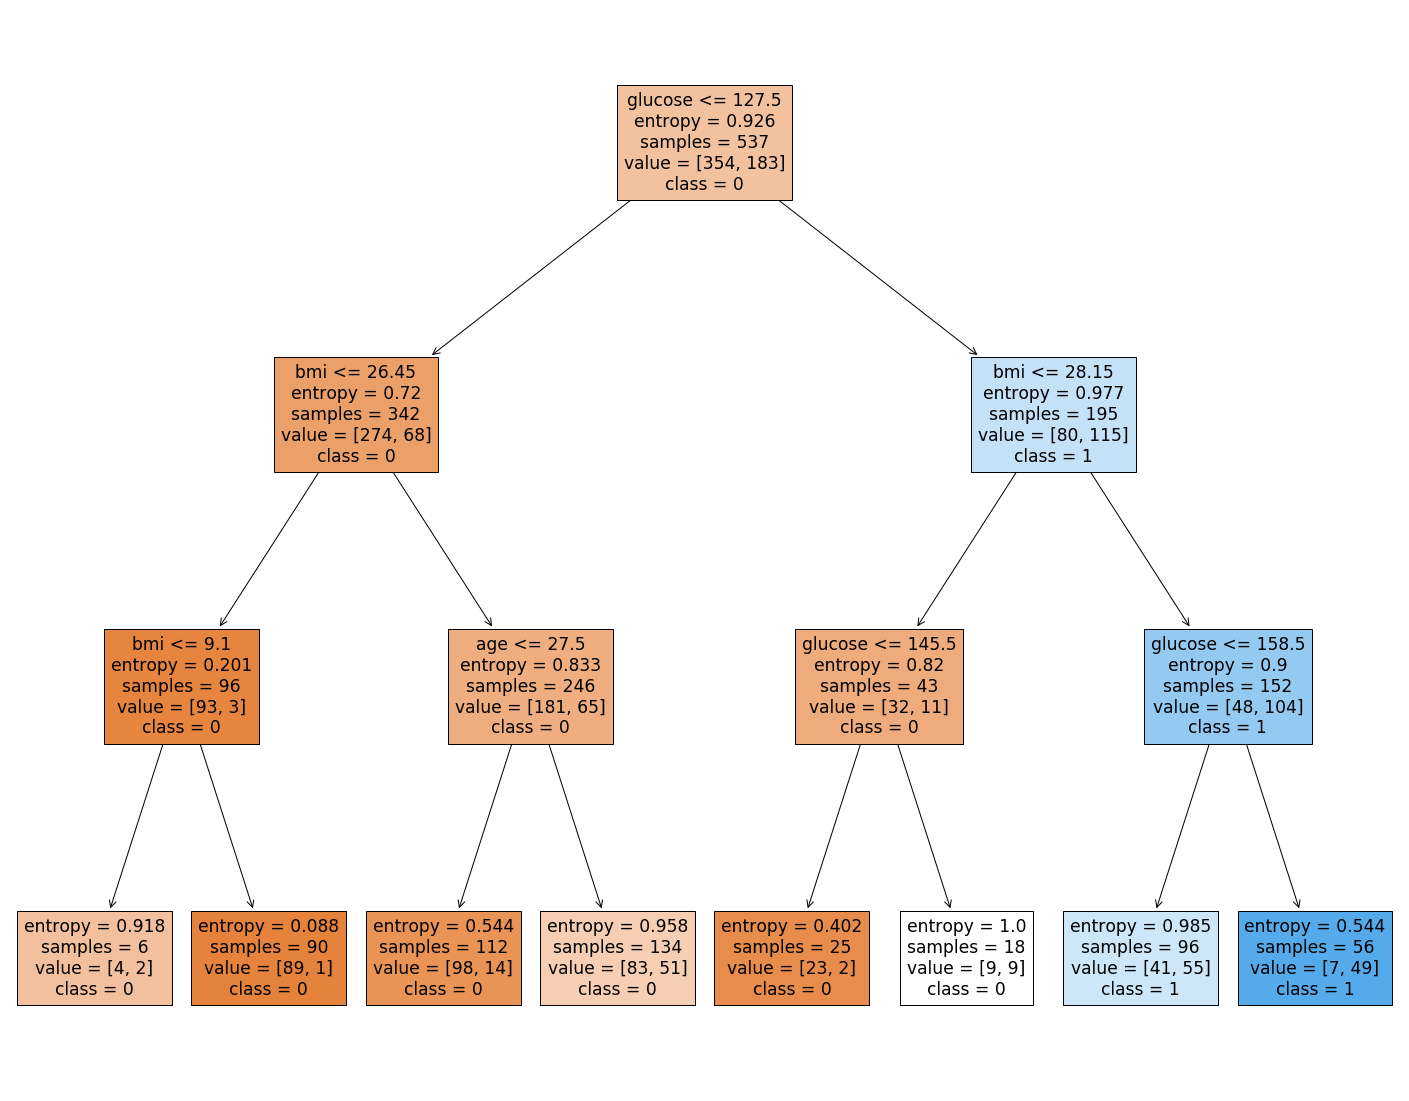

In [14]:
from matplotlib import pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(25,20))
plt_tree = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)